# Patch embedding

### Conv2d

In [1]:
import torch
from torch import nn

# Set the patch size
patch_size=8
tensor = torch.randn((3,224,224)).unsqueeze(0)
# Create the Conv2d layer with hyperparameters from the ViT paper
conv2d = nn.Conv2d(in_channels=3, # number of channels
                   out_channels=192 , # from Table 1: Hidden size D, this is the embedding size HxW/P²
                   kernel_size=patch_size, # could also use (patch_size, patch_size)
                   stride=patch_size,
                   padding=0)


print(f"Input tensor shape : {tensor.shape}")
print(f"Number of samples = {tensor.shape[0]} | C = {tensor.shape[1]} | H = {tensor.shape[2]} | W = {tensor.shape[3]}")
print("\n")

patches = conv2d(tensor)

print(f"Output tensor shape : {patches.shape}")
print(f"Number of samples = {patches.shape[0]} | Number of patchs = HxW/patch_size² (224²/8²) = 28 * 28 = {patches.shape[2]*patches.shape[3]} | Number of pixels in patch (8x8x3) = D (embedding size) = {patches.shape[1]}")

Input tensor shape : torch.Size([1, 3, 224, 224])
Number of samples = 1 | C = 3 | H = 224 | W = 224


Output tensor shape : torch.Size([1, 192, 28, 28])
Number of samples = 1 | Number of patchs = HxW/patch_size² (224²/8²) = 28 * 28 = 784 | Number of pixels in patch (8x8x3) = D (embedding size) = 192


Showing random convolutional feature maps from indexes: [50, 165, 97, 74, 40]


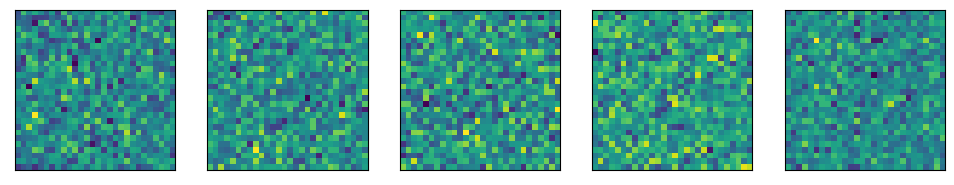

In [2]:
# Plot random 5 convolutional feature maps
import random
import matplotlib.pyplot as plt

random_indexes = random.sample(range(0, 192), k=5) # pick 5 numbers between 0 and the embedding size
print(f"Showing random convolutional feature maps from indexes: {random_indexes}")

# Create plot
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(12, 12))

# Plot random image feature maps
for i, idx in enumerate(random_indexes):
    image_conv_feature_map = patches[:, idx, :, :] # index on the output tensor of the convolutional layer
    axs[i].imshow(image_conv_feature_map.squeeze().detach().numpy())
    axs[i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[]);

## Flatten

In [3]:
flatten = nn.Flatten(start_dim=2,end_dim=3)

embeddings = flatten(patches)

print(f"Numbre of samples = {embeddings.shape[0]} | P^2 x C = {embeddings.shape[1]} | N = {embeddings.shape[2]}")

Numbre of samples = 1 | P^2 x C = 192 | N = 784


In [4]:
embeddings = embeddings.permute(0, 2, 1) 
print(f"Numbre of samples = {embeddings.shape[0]} | N = {embeddings.shape[1]} | P^2 x C  = {embeddings.shape[2]}")

Numbre of samples = 1 | N = 784 | P^2 x C  = 192


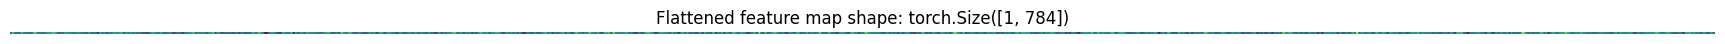

In [5]:
# Get a single flattened feature map
single_flattened_feature_map = embeddings[:, :, 0] # index: (batch_size, number_of_patches, embedding_dimension)

# Plot the flattened feature map visually
plt.figure(figsize=(22, 22))
plt.imshow(single_flattened_feature_map.detach().numpy())
plt.title(f"Flattened feature map shape: {single_flattened_feature_map.shape}")
plt.axis(False);

## Test on image 

In [6]:
image = plt.imread("images\cell2615.png")
image.shape

(300, 300)

In [7]:
from torchvision import transforms

transforms = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Resize((224,224)) 
    ]
)
image = transforms(image)
image.shape

torch.Size([1, 224, 224])

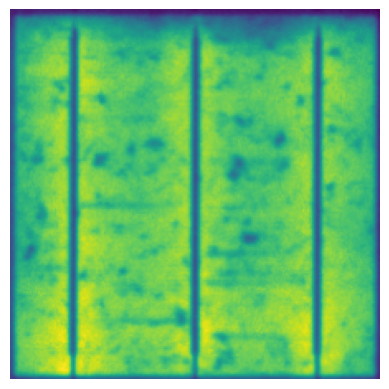

In [8]:
plt.imshow(image.permute(2,1,0)) # adjust for matplotlib
plt.axis(False);

In [9]:
image = image.unsqueeze(0)

In [10]:
image.shape

torch.Size([1, 1, 224, 224])

In [11]:
import torch
from torch import nn

# Set the patch size
patch_size=8

# Create the Conv2d layer with hyperparameters from the ViT paper
conv2d = nn.Conv2d(in_channels=1, # number of channels
                   out_channels=64 , # from Table 1: Hidden size D, this is the embedding size HxW/P²
                   kernel_size=patch_size, # could also use (patch_size, patch_size)
                   stride=patch_size,
                   padding=0)


print(f"Input tensor shape : {image.shape}")
print(f"Number of samples = {image.shape[0]} | C = {image.shape[1]} | H = {image.shape[2]} | W = {image.shape[3]}")
print("\n")

patches = conv2d(image)

print(f"Output tensor shape : {patches.shape}")
print(f"Number of samples = {patches.shape[0]} | Number of patchs = HxW/patch_size² (224²/8²) = 28 * 28 = {patches.shape[2]*patches.shape[3]} | Number of pixels in patch (8x8x1) = D (embedding size) = {patches.shape[1]}")

Input tensor shape : torch.Size([1, 1, 224, 224])
Number of samples = 1 | C = 1 | H = 224 | W = 224


Output tensor shape : torch.Size([1, 64, 28, 28])
Number of samples = 1 | Number of patchs = HxW/patch_size² (224²/8²) = 28 * 28 = 784 | Number of pixels in patch (8x8x1) = D (embedding size) = 64


Showing random convolutional feature maps from indexes: [53, 35, 27, 33, 62]


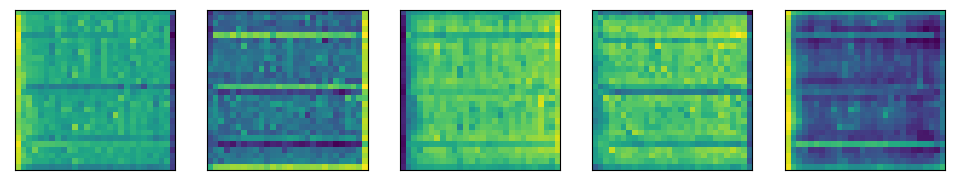

In [12]:
# Plot random 5 convolutional feature maps
import random
import matplotlib.pyplot as plt

random_indexes = random.sample(range(0, 64), k=5) # pick 5 numbers between 0 and the embedding size
print(f"Showing random convolutional feature maps from indexes: {random_indexes}")

# Create plot
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(12, 12))

# Plot random image feature maps
for i, idx in enumerate(random_indexes):
    image_conv_feature_map = patches[:, idx, :, :] # index on the output tensor of the convolutional layer
    axs[i].imshow(image_conv_feature_map.squeeze().detach().numpy())
    axs[i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[]);

In [13]:
flatten = nn.Flatten(start_dim=2,end_dim=3)

embeddings = flatten(patches).permute(0, 2, 1) 

print(f"Numbre of samples = {embeddings.shape[0]} | N = {embeddings.shape[1]} | P^2 x C  = {embeddings.shape[2]}")

Numbre of samples = 1 | N = 784 | P^2 x C  = 64


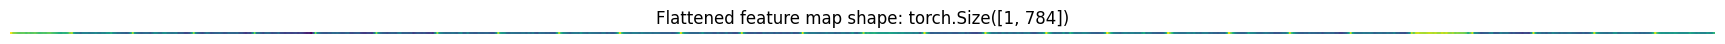

In [14]:
# Get a single flattened feature map
single_flattened_feature_map = embeddings[:, :, 0] # index: (batch_size, number_of_patches, embedding_dimension)

# Plot the flattened feature map visually
plt.figure(figsize=(22, 22))
plt.imshow(single_flattened_feature_map.detach().numpy())
plt.title(f"Flattened feature map shape: {single_flattened_feature_map.shape}")
plt.axis(False);

In [15]:
class PatchEmbedding(nn.Module):
    """Turns a 2D input image into a 1D sequence learnable embedding vector.

    Args:
        in_channels (int): Number of color channels for the input images.
        patch_size (int): Size of patches to convert input image into.
        embedding_dim (int): Size of embedding to turn image into.
    """
    
    def __init__(self,
                 in_channels:int,
                 patch_size:int,
                 embedding_dim:int):
        super().__init__()

        # image into patches
        self.patcher = nn.Conv2d(in_channels=in_channels,
                                 out_channels=embedding_dim,
                                 kernel_size=patch_size,
                                 stride=patch_size,
                                 padding=0)

        # flatten the patch feature maps into a single dimension
        self.flatten = nn.Flatten(start_dim=2,end_dim=3)


    def forward(self, x):
        # check that inputs are the correct shape
        image_resolution = x.shape[-1]
        assert image_resolution % patch_size == 0, f"Input image size must be divisble by patch size, image shape: {image_resolution}, patch size: {patch_size}"

 
        x_patched = self.patcher(x)
        x_flattened = self.flatten(x_patched)

        return x_flattened.permute(0, 2, 1) # adjust [batch_size, P^2•C, N] -> [batch_size, N, P^2•C]

In [16]:

patchify = PatchEmbedding(in_channels=1,
                          patch_size=8,
                          embedding_dim=64)

image = plt.imread("images\cell2615.png")
image = transforms(image)

print(f"Input image shape: {image.unsqueeze(0).shape}")
patch_embedded_image = patchify(image.unsqueeze(0)) # add an extra batch dimension 
print(f"Output patch embedding shape: {patch_embedded_image.shape}")

Input image shape: torch.Size([1, 1, 224, 224])
Output patch embedding shape: torch.Size([1, 784, 64])


## Class token embedding

In [17]:
batch_size = patch_embedded_image.shape[0]
embedding_dimension = patch_embedded_image.shape[-1]

# Create the class token embedding as a learnable parameter that shares the same size as the embedding dimension (D)
class_token = nn.Parameter(torch.ones(batch_size, 1, embedding_dimension), # [batch_size, number_of_tokens, embedding_dimension]
                           requires_grad=True) # make sure the embedding is learnable

print(f"Class token shape: {class_token.shape} -> [batch_size, number_of_tokens, embedding_dimension]")

Class token shape: torch.Size([1, 1, 64]) -> [batch_size, number_of_tokens, embedding_dimension]


In [18]:
# Add the class token embedding to the front of the patch embedding
patch_embedded_image_with_class_embedding = torch.cat((class_token, patch_embedded_image),dim=1) 

print(patch_embedded_image_with_class_embedding)
print(f"Sequence of patch embeddings with class token prepended shape: {patch_embedded_image_with_class_embedding.shape} -> [batch_size, number_of_patches, embedding_dimension]")

tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [-0.0529,  0.2681,  0.1768,  ..., -0.1466,  0.0630,  0.1959],
         [ 0.0313,  0.2646,  0.2052,  ..., -0.0885,  0.0357,  0.3742],
         ...,
         [-0.0959,  0.3092,  0.3142,  ..., -0.0152,  0.1912,  0.2495],
         [-0.1218,  0.3089,  0.2832,  ..., -0.0018,  0.2021,  0.2082],
         [-0.0311,  0.3557,  0.3040,  ...,  0.0353,  0.1763,  0.1850]]],
       grad_fn=<CatBackward0>)
Sequence of patch embeddings with class token prepended shape: torch.Size([1, 785, 64]) -> [batch_size, number_of_patches, embedding_dimension]


# Position embedding

In [19]:
# N (number of patches)
number_of_patches = patch_embedded_image_with_class_embedding.shape[1]
# embedding dimension
embedding_dimension = patch_embedded_image_with_class_embedding.shape[2]

# Create the learnable 1D position embedding
position_embedding = nn.Parameter(torch.ones(1,
                                             number_of_patches,
                                             embedding_dimension),
                                  requires_grad=True) # make sure it's learnable


print(position_embedding)
print(f"Position embeddding shape: {position_embedding.shape} -> [batch_size, number_of_patches, embedding_dimension]")

Parameter containing:
tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]], requires_grad=True)
Position embeddding shape: torch.Size([1, 785, 64]) -> [batch_size, number_of_patches, embedding_dimension]


In [20]:
# Add the position embedding to the patch and class token embedding
patch_and_position_embedding = patch_embedded_image_with_class_embedding + position_embedding

print(patch_and_position_embedding)

print(f"Patch embeddings, class token prepended and positional embeddings added shape: {patch_and_position_embedding.shape} -> [batch_size, number_of_patches, embedding_dimension]")

tensor([[[2.0000, 2.0000, 2.0000,  ..., 2.0000, 2.0000, 2.0000],
         [0.9471, 1.2681, 1.1768,  ..., 0.8534, 1.0630, 1.1959],
         [1.0313, 1.2646, 1.2052,  ..., 0.9115, 1.0357, 1.3742],
         ...,
         [0.9041, 1.3092, 1.3142,  ..., 0.9848, 1.1912, 1.2495],
         [0.8782, 1.3089, 1.2832,  ..., 0.9982, 1.2021, 1.2082],
         [0.9689, 1.3557, 1.3040,  ..., 1.0353, 1.1763, 1.1850]]],
       grad_fn=<AddBackward0>)
Patch embeddings, class token prepended and positional embeddings added shape: torch.Size([1, 785, 64]) -> [batch_size, number_of_patches, embedding_dimension]


In [21]:
in_channels = 1
patch_size = 8
embedding_dim = patch_size**2 * in_channels # P² x C

print(f"Image tensor shape: {image.shape}")
height, width = image.shape[1], image.shape[2]

x = image.unsqueeze(0)
print(f"Input image with batch dimension shape: {x.shape}")

# patch embedding 
patch_embedding_layer = PatchEmbedding(in_channels=in_channels,
                                       patch_size=patch_size,
                                       embedding_dim=embedding_dim)


patch_embedding = patch_embedding_layer(x)
print(f"Patching embedding shape: {patch_embedding.shape}")

# class token embedding
batch_size = patch_embedding.shape[0]
embedding_dimension = patch_embedding.shape[-1]
class_token = nn.Parameter(torch.ones(batch_size, 1, embedding_dimension),
                           requires_grad=True) # make sure it's learnable
print(f"Class token embedding shape: {class_token.shape}")


patch_embedding_class_token = torch.cat((class_token, patch_embedding), dim=1)
print(f"Patch embedding with class token shape: {patch_embedding_class_token.shape}")

# position embedding
number_of_patches = int((height * width) / patch_size**2)
position_embedding = nn.Parameter(torch.ones(1, number_of_patches+1, embedding_dimension),
                                  requires_grad=True) # make sure it's learnable


patch_and_position_embedding = patch_embedding_class_token + position_embedding


print(f"Patch and position embedding shape: {patch_and_position_embedding.shape}")

Image tensor shape: torch.Size([1, 224, 224])
Input image with batch dimension shape: torch.Size([1, 1, 224, 224])
Patching embedding shape: torch.Size([1, 784, 64])
Class token embedding shape: torch.Size([1, 1, 64])
Patch embedding with class token shape: torch.Size([1, 785, 64])
Patch and position embedding shape: torch.Size([1, 785, 64])


# Multi-Head Attention (MSA)

In [22]:

class MultiheadSelfAttentionBlock(nn.Module):

    def __init__(self,
                 embedding_dim:int,
                 num_heads:int=8, # Heads from Table 1 for ViT-Base
                 attn_dropout:float=0): # the paper doesn't uses any dropout in MSABlocks
        super().__init__()

        # Norm layer (LN)
        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

        # MSA layer
        self.multihead_attn = nn.MultiheadAttention(embed_dim=embedding_dim,
                                                    num_heads=num_heads,
                                                    dropout=attn_dropout,
                                                    batch_first=True) # batch dimension come first


    def forward(self, x):
        x = self.layer_norm(x)
        attn_output, _ = self.multihead_attn(query=x, 
                                             key=x, 
                                             value=x, 
                                             need_weights=False) # we need just the layer outputs
        return attn_output

In [23]:
MSA =MultiheadSelfAttentionBlock(embedding_dim=embedding_dim)
msa_output = MSA(patch_and_position_embedding)

print(f"Input shape : {patch_and_position_embedding.shape}")
print(f"Output shape : {msa_output.shape}")

Input shape : torch.Size([1, 785, 64])
Output shape : torch.Size([1, 785, 64])


# Multilayer Perceptron (MLP)

In [24]:

class MLPBlock(nn.Module):

    def __init__(self,
                 embedding_dim:int=64, # Hidden Size D 
                 mlp_size:int=3072, # MLP size from Table 1 for ViT-Base
                 dropout:float=0.5): # Dropout 
        super().__init__()

        # Norm layer (LN)
        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

        # Multilayer perceptron (MLP) 
        self.mlp = nn.Sequential(
            nn.Linear(in_features=embedding_dim,
                      out_features=mlp_size),
            nn.ReLU(), # ReLU non-linearity 
            nn.Dropout(p=dropout),
            nn.Linear(in_features=mlp_size, # needs to take same in_features as out_features of layer above
                      out_features=embedding_dim), # take back to embedding_dim
            nn.Dropout(p=dropout) # Dropout applied after every dense layer
        )

    def forward(self, x):
        x = self.layer_norm(x)
        x = self.mlp(x)
        return x

In [25]:

mlp_block = MLPBlock() 

# Pass output of MSABlock through MLPBlock
patched_image_through_mlp_block = mlp_block(msa_output)
print(f"Input shape of MLP block: {msa_output.shape}")
print(f"Output shape MLP block: {patched_image_through_mlp_block.shape}")

Input shape of MLP block: torch.Size([1, 785, 64])
Output shape MLP block: torch.Size([1, 785, 64])


In [26]:
class TransformerEncoderBlock(nn.Module):
    def __init__(self,
                 embedding_dim : int,
                 num_heads : int = 8,
                 attn_dropout:float=0,
                 mlp_size:int=3072, # MLP size from Table 1 for ViT-Base
                 dropout:float=0.5, # from Table 1 for ViT-Base
    ):
        super().__init__()

        self.MSA = MultiheadSelfAttentionBlock(embedding_dim=embedding_dim)
        self.MLP = MLPBlock(embedding_dim=embedding_dim)

    
    def forward(self,x):
        x = self.MSA(x) + x  # 1st residual
        x = self.MLP(x) + x # 2nd residual
        return x

In [27]:
from torchinfo import summary

In [28]:
transformer_encoder_block = TransformerEncoderBlock(embedding_dim=64)

# Print an input and output summary of our Transformer Encoder (uncomment for full output)
summary(model=transformer_encoder_block,
         input_size=(1, 785,64), # (batch_size, num_patches, embedding_dimension)
         col_names=["input_size", "output_size", "num_params", "trainable"],
         col_width=20,
         row_settings=["var_names"])

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
TransformerEncoderBlock (TransformerEncoderBlock)  [1, 785, 64]         [1, 785, 64]         --                   True
├─MultiheadSelfAttentionBlock (MSA)                [1, 785, 64]         [1, 785, 64]         --                   True
│    └─LayerNorm (layer_norm)                      [1, 785, 64]         [1, 785, 64]         128                  True
│    └─MultiheadAttention (multihead_attn)         --                   [1, 785, 64]         16,640               True
├─MLPBlock (MLP)                                   [1, 785, 64]         [1, 785, 64]         --                   True
│    └─LayerNorm (layer_norm)                      [1, 785, 64]         [1, 785, 64]         128                  True
│    └─Sequential (mlp)                            [1, 785, 64]         [1, 785, 64]         --                   True
│    │    └─Linear (0)                     

In [29]:
16**2 *3

768

In [30]:
16*16*3

768

In [31]:
class ViT(nn.Module):
    def __init__(self, 
                 image_size :int = 224 ,
                 in_channels :int = 3,
                 patch_size :int = 16,
                 embedding_dim :int = 768,
                 num_transformer_layers :int = 12,
                 mlp_size :int = 3072,
                 num_heads :int = 12 ,
                 attn_dropout :float = 0.0,
                 mlp_dropout :float = 0.5,
                 embedding_dropout :float = 0.1,
                 num_classes :int =10):

        super().__init__()  

        assert image_size % patch_size == 0 , f"Image size should be divisible bypatch size"

        # Prepare image 
        self.num_patches =  int(image_size**2//patch_size**2)
    

        self.class_embedding = nn.Parameter(data = torch.randn(1,1,embedding_dim),
                                            requires_grad=True)

        self.position_embedding = nn.Parameter(data= torch.randn(1, self.num_patches+1, embedding_dim),
                                               requires_grad=True)
        
        self.embedding_dropout = nn.Dropout(p=embedding_dropout)

        self.patch_embedding = PatchEmbedding(in_channels=in_channels,
                                              patch_size=patch_size,
                                              embedding_dim=embedding_dim)
    
        # Transformer Encoder multi layers
        self.transformer_encoder = nn.Sequential(*[TransformerEncoderBlock(embedding_dim=embedding_dim,
                                                                            num_heads=num_heads,
                                                                            mlp_size=mlp_size,
                                                                            dropout=mlp_dropout) for _ in range(num_transformer_layers)])
        
        # Classifier
        self.classifier = nn.Sequential(
            nn.LayerNorm(normalized_shape=embedding_dim),
            nn.Linear(in_features=embedding_dim,
                      out_features=num_classes)
        )        


    def forward(self, x):

        # batch size
        batch_size = x.shape[0]

        # expand class token embedding to match the batch size
        class_token = self.class_embedding.expand(batch_size, -1, -1) 

        # patch embedding 
        x = self.patch_embedding(x)

        # Concat class embedding and patch embedding 
        x = torch.cat((class_token, x), dim=1)

        # Add position embedding to patch embedding 
        x = self.position_embedding + x

        # embedding dropout 
        x = self.embedding_dropout(x)

        # transformer encoder layers 
        x = self.transformer_encoder(x)

        # 19. Put 0 index logit through classifier (equation 4)
        x = self.classifier(x[:, 0]) # run on each sample in a batch at 0 index

        return x

In [32]:
random_image_tensor = torch.randn(1, 3, 224, 224) 

vit = ViT(num_classes=10)

vit(random_image_tensor)

tensor([[ 0.2744, -0.0249,  0.2911, -0.2476, -0.0976, -0.2611, -0.6682,  0.4288,
         -0.5756, -0.2729]], grad_fn=<AddmmBackward0>)

In [33]:
from vit import vit_classifier
import torch

random_image_tensor = torch.randn(1, 3, 224, 224) 

vit = vit_classifier()

vit(random_image_tensor)

tensor([[-0.6523,  0.1340, -0.9631, -0.4354, -0.0661,  0.0211,  0.4105,  0.6307,
         -0.2712,  0.7001]], grad_fn=<AddmmBackward0>)